**Estimación de duración de pólizas**

**1. Bases de datos**
Se desea construir un modelo que permita, con una serie de datos de entrada (100.000 registros)
estimar cuantos años durará una póliza de seguros. Para ello, se entregará una base datos
(datos A) con la siguiente información:

· ID: Identificador de registro.

· OPCIÓN: Tipo de plan elegido.

· FECHA_NACIMIENTO: Fecha de nacimiento del asegurado

· SEXO: Sexo del asegurado.

· NOMBRE_AGENCIA: Agencia donde fue vendida la póliza

· SUMA_AEGURADA: límite máximo de indemnización que va a pagar la aseguradora en caso de siniestro.

· CIUDAD: Ciudad de residencia del asegurado

· PRIMA_ANUAL: Precio en dólares, que el asegurado paga por la cobertura que recibe del riesgo asegurado.

· PRIMA_PAGADA: Valor acumulado en dólares pagado por el asegurado a septiembre del 2020.

· DURACIÓN: Tiempo en años de vigencia de la póliza, desde la fecha de inicio de vigencia hasta la fecha de cancelación.

Nótese que la variable dependiente es la duración y las variables independientes son las
demás.

In [1]:
#Importamos las siguientes librerias de python para manipular y graficar los datos, además de Scikit-learn 
#o biblioteca para aprendizaje automático para usar modelos de Machine Learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import metrics

Escriba por favor la ruta en donde se encuentran las bases de datos para estimar la duración de polizas:

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#Leemos la base de datos de entrenamiento de la estimación de la duración de pólizas
df=pd.read_excel('/content/sample_data/datos_A.xlsx')
dft=pd.read_excel('/content/sample_data/datos_B.xlsx')

In [3]:
#Asignamos la variable indicadora o index de las respectivas bases de datos
df.set_index('ID', inplace = True)
#dft.set_index('ID', inplace = True)

In [4]:
#Revisamos que haya cargado bien los datos y revisamos cómo se encuentran en calidad, errores, faltantes, nulos, etc.
df.head(20)

,OPCION,FECHA_NACIMIENTO,SEXO,NOMBRE_AGENCIA,SUMA_ASEGURADA,CIUDAD,PRIMA_ANUAL,PRIMA_PAGADA,DURACION
ID,,,,,,,,,
47613,13,1971-02-08,F,SAN FRANCISCO GOTERA ...,10000,EL DIVISADERO,204,68,0.6958
76124,11,1980-12-24,M,PLAZA CENTRO ...,10000,ILOPANGO,96,104,1.4794
16258,13,1967-08-28,F,QUEZALTEPEQUE ...,10000,SAN MATIAS,204,2448,11.0246
90407,16,1958-01-01,F,LOS PROCERES ...,10000,MEJICANOS,660,660,1.3479
25537,17,1949-12-28,F,CIUDAD ARCE ...,10000,CIUDAD ARCE,792,792,1.1917
6257,14,1966-02-08,F,SANTA ANA ...,10000,SANTA ANA,300,300,1.2054
17409,11,1987-08-01,M,C.A.F. PLAZA MUNDO ...,10000,SOYAPANGO,96,96,1.2246
17538,16,1956-04-16,F,SAN MARTIN ...,10000,SAN MARTIN,660,880,1.5041
118755,11,1986-11-14,F,LA MERCED ...,10000,SAN MIGUEL,96,8,0.3534


In [ ]:
#El siguiente comando nos permite identificar qué tipo de variable se tomó al leer el archivo.
df.dtypes

OPCION                       int64
FECHA_NACIMIENTO    datetime64[ns]
SEXO                        object
NOMBRE_AGENCIA              object
SUMA_ASEGURADA               int64
CIUDAD                      object
PRIMA_ANUAL                  int64
PRIMA_PAGADA                 int64
DURACION                   float64
dtype: object

Se convierte la variable FECHA_NACIMIENTO en el cálculo de la edad del asegurado para usarla en el análisis y en los modelos

In [5]:
df['EDAD']=round((dt.datetime.now()-df['FECHA_NACIMIENTO'])/np.timedelta64(1,'Y'))

In [6]:
#Revisemos si la data esta completa o tiene valores nulos, en caso tal revisamos el porcentaje de datos nulos
print(df.isnull().sum())
print(df.isnull().sum()/len(df)*100)

OPCION               0
FECHA_NACIMIENTO     0
SEXO                 0
NOMBRE_AGENCIA       0
SUMA_ASEGURADA       0
CIUDAD              17
PRIMA_ANUAL          0
PRIMA_PAGADA         0
DURACION             0
EDAD                 0
dtype: int64
OPCION              0.000
FECHA_NACIMIENTO    0.000
SEXO                0.000
NOMBRE_AGENCIA      0.000
SUMA_ASEGURADA      0.000
CIUDAD              0.017
PRIMA_ANUAL         0.000
PRIMA_PAGADA        0.000
DURACION            0.000
EDAD                0.000
dtype: float64


In [ ]:
#Analizamos algunas estatísticas generales de las variables que componen la Base de Datos - BD
df.describe()

,OPCION,SUMA_ASEGURADA,PRIMA_ANUAL,PRIMA_PAGADA,DURACION,EDAD
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,14.360860,12350.70000,220.906320,775.754170,2.950744,42.333730
std,6.957845,6660.30428,266.961706,1872.378762,3.335180,9.712969
min,11.000000,10000.00000,96.000000,8.000000,-0.010900,26.000000
25%,11.000000,10000.00000,96.000000,37.000000,0.526000,35.000000
50%,11.000000,10000.00000,96.000000,176.000000,1.320500,41.000000
75%,14.000000,10000.00000,204.000000,752.000000,4.476700,48.000000
max,47.000000,40000.00000,3168.000000,38016.000000,13.983500,76.000000


In [ ]:
#El data set completo esta conformado por 9 variables independientes (Considerando la edad calculada) y la Variable
#Objetivo "Duracion" y 100 mil filas
print(df.shape)

(100000, 10)


In [ ]:
#Revisamos como está conformada la variable objetivo, la cual se mide en años de duración en la póliza de seguros
print(df['DURACION'])

ID
47613      0.6958
76124      1.4794
16258     11.0246
90407      1.3479
25537      1.1917
           ...   
108125     0.3808
94680      8.2684
58578      0.5150
95281      8.1972
31139      7.1287
Name: DURACION, Length: 100000, dtype: float64


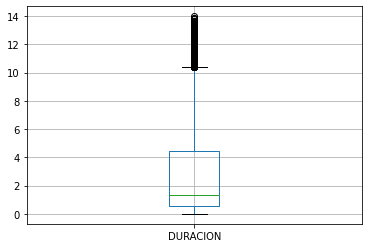

In [ ]:
#Realizamos el siguiente BoxPLot para revisar cómo se distribuye la variable dependiente "Duracion"
df.boxplot(column = ['DURACION'])

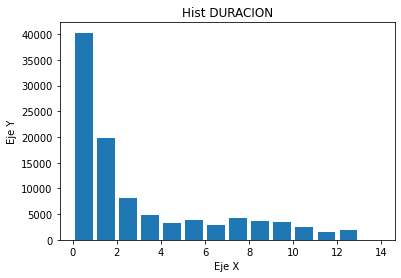

In [ ]:
#Histograma de la variable respuesta Duracion
bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.hist(df['DURACION'],bins,histtype='bar',rwidth=0.8)
plt.title('Hist DURACION')
plt.ylabel('Eje Y')
plt.xlabel('Eje X')
plt.show()

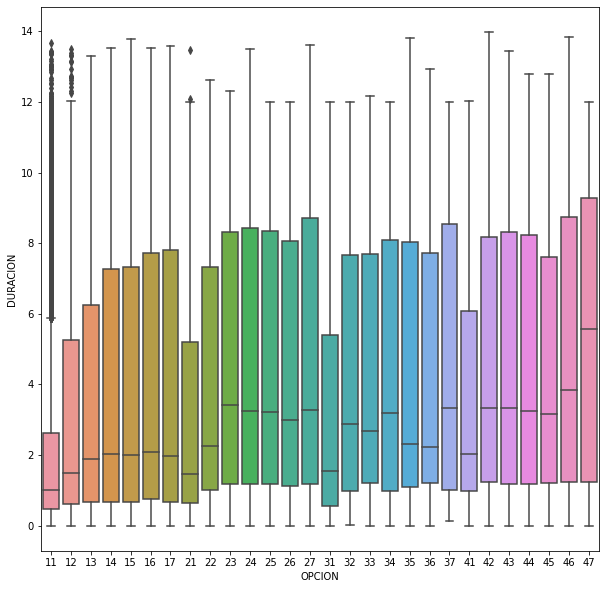

In [ ]:
#Grafiquemos un boxplot por cada tipo de plan para analizar cómo se comportan según la duración en la póliza.
#La mediana más alta se observa en el plan 47. Aunque el plan 11 es el que más asegurados tiene, es el que tiene un cuerpo
#o caja más pequeña y tiene una cola pesada a la derecha debido a un gran número de datos atípicos.
plt.figure(figsize=(10, 10))
sns.boxplot(x='OPCION',y='DURACION', data=df)

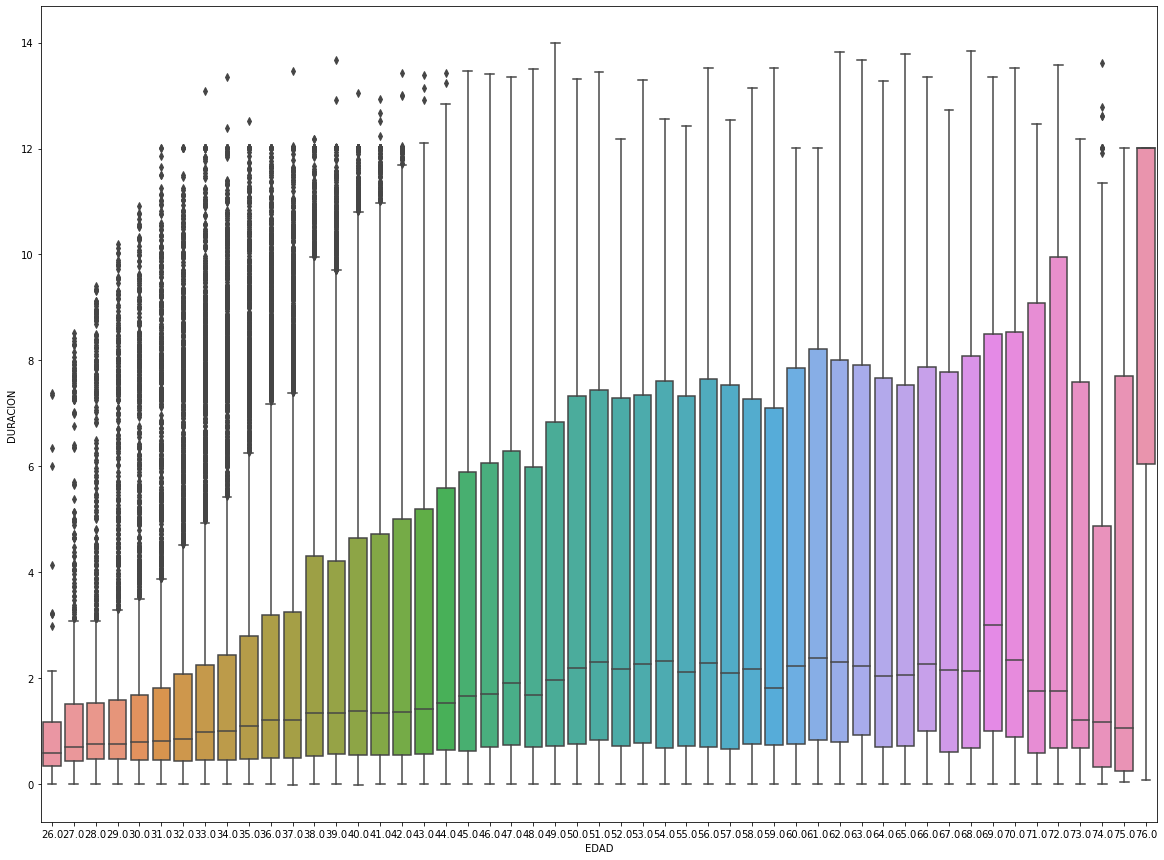

In [ ]:
#En los siguientes diagramas BoxPlot, se identifica que a medida que incrementa la edad de la persona, tienen una duración
#mayor en la póliza.
plt.figure(figsize=(20, 15))
sns.boxplot(x="EDAD",y="DURACION", data=df)

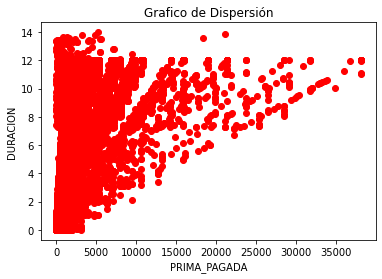

In [ ]:
#Histograma de la Prima_Pagada  vs Duracion. Este gráfico se hace porque se cree que la Prima Pagada puede ser un buen predictor o variable relacionada
#con la duración en la póliza de seguros.
plt.scatter(df['PRIMA_PAGADA'],df['DURACION'],label='Datos 1',color='red')
plt.title('Grafico de Dispersión')
plt.ylabel('DURACION')
plt.xlabel('PRIMA_PAGADA')
plt.show()

La siguiente tabla resumen lo observado en los BoxPlot. Se identifica que el plan 11 es el que tiene mayor número de asegurados, sin embargo tiene la media de duración más pequeña (2.24 años). A su vez el plan 47 tiene la media de duración más alta (5.49 años). Así vamos entendiendo con estadística descriptiva el comportamiento de los datos.

In [ ]:
df.groupby(['OPCION']).DURACION.describe()

,count,mean,std,min,25%,50%,75%,max
OPCION,,,,,,,,
11,50529.0,2.245392,2.808028,-0.0109,0.468400,1.02460,2.632800,13.6657
12,13629.0,3.219378,3.392919,0.0027,0.605400,1.48210,5.252000,13.5041
13,9113.0,3.599987,3.609443,0.0027,0.663000,1.87670,6.263000,13.2904
14,5610.0,3.789934,3.743674,0.0027,0.663000,2.02325,7.260200,13.5178
15,3429.0,3.849261,3.831900,0.0027,0.668400,2.00540,7.317800,13.7808
16,2042.0,4.035400,3.958009,0.0027,0.750600,2.08765,7.719825,13.5205
17,1659.0,3.915488,3.894427,0.0027,0.673900,1.98630,7.810900,13.5780
21,3902.0,3.208830,3.388464,-0.0082,0.632800,1.47530,5.193800,13.4575
22,1668.0,4.006185,3.690542,0.0027,1.000000,2.27120,7.339700,12.6219


De manera similar al plan o a la opcion, se hizo un análisis para la edad como se presenta en la siguiente tabla. Se aprecia que a medida que aumenta la edad de los asegurados, la duración en la póliza también incrementa. Es decir, que las personas de mayor edad en promedio, tienen una mayor duración en la póliza.

In [ ]:
df.groupby(['EDAD']).DURACION.describe()

,count,mean,std,min,25%,50%,75%,max
EDAD,,,,,,,,
26.0,72.0,1.191538,1.606563,0.0109,0.343125,0.59585,1.171875,7.3753
27.0,863.0,1.400416,1.794365,0.0027,0.436950,0.69310,1.504100,8.5178
28.0,1476.0,1.553404,1.992214,0.0027,0.479400,0.75750,1.523200,9.4054
29.0,2152.0,1.523112,1.942515,0.0027,0.468400,0.75890,1.597900,10.1945
30.0,2761.0,1.573028,2.019864,0.0027,0.454700,0.78900,1.673900,10.9232
31.0,3297.0,1.700999,2.213879,0.0027,0.452000,0.80540,1.824600,12.0054
32.0,3907.0,1.869859,2.398825,0.0027,0.446500,0.85470,2.082150,12.0054
33.0,4555.0,1.982114,2.480270,0.0027,0.463000,0.98350,2.253350,13.0821
34.0,4492.0,2.131508,2.663544,0.0027,0.452000,1.00000,2.443800,13.3506


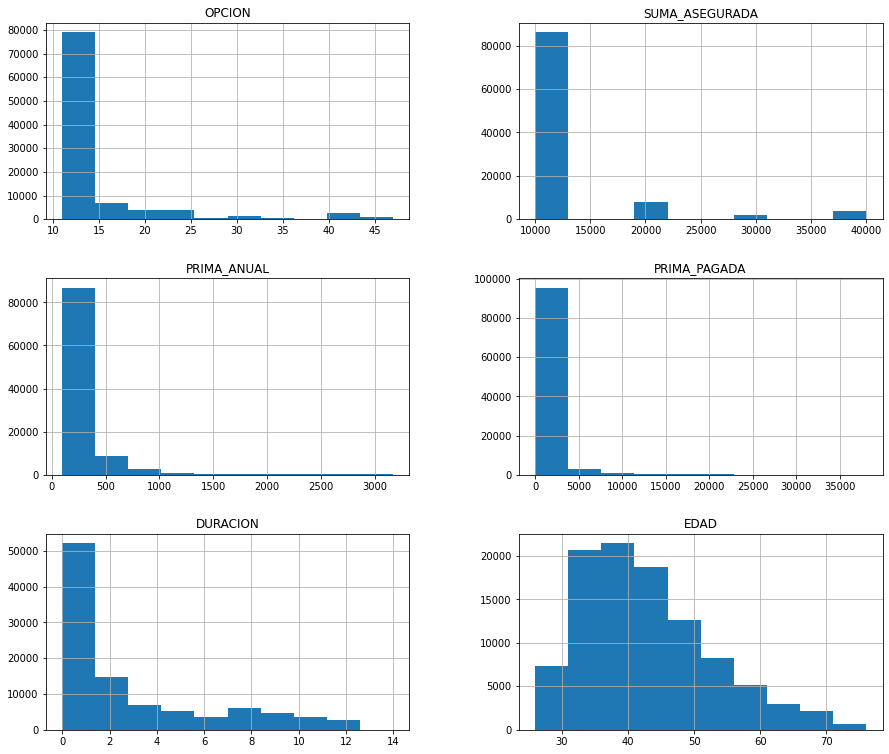

In [ ]:
#Realicemos un histograma para las variables numéricas del Data Set. Se evidencia que la variable duración de la póliza los
#datos se concentran entre 0 a 2 años. La variable Opción indica que la mayoría de los asegurados están en el plan de 11 a 14.
#Los valores de la prima anual y la prima pagada se concentran en valores pequeños.
#La mayoría de los asegurados se concentran con edades entre los 30 y los 45 años.
df.hist(figsize=(15,13))
plt.show()

Correlacion. La correlación es una medida de la relación entre variables que se mide en una escala de -1 a 1. Cuanto más cercano sea el valor de correlación a -1 o 1, más fuerte será la relación, y mientras más cerca de 0, más débil será la relación. Mide cómo el cambio en una variable está asociado con el cambio en otra variable.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3788d16a50>,
      dtype=object)

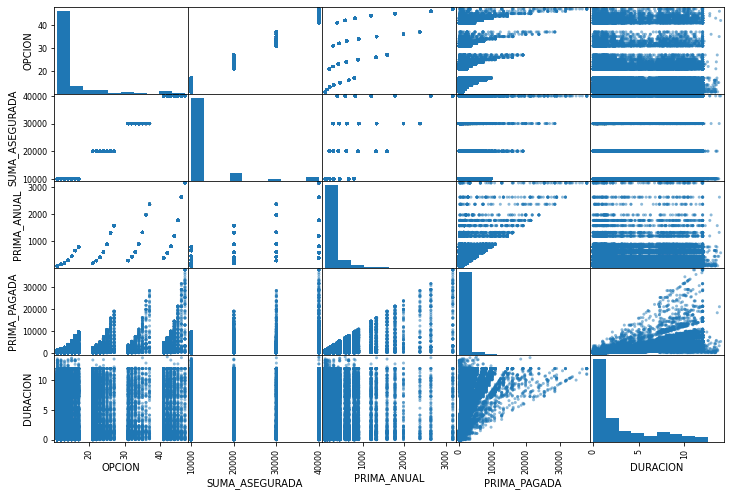

In [ ]:
#De acuerdo a lo anterior, realicemos gráficos se dispersión con el siguiente comando. Así se puede observar gráficamente
#si puede existir una correlación entre algunas variables. Se aprecia lo identificado con la prueba de una relación entre
#la prima pagada y la duración.
from pandas.plotting import scatter_matrix
attributes = ["OPCION","SUMA_ASEGURADA","PRIMA_ANUAL","PRIMA_PAGADA","DURACION"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [7]:
#Miremos la correlación entre las variables del DF
corr_p = df.corr()
corr_k = df.corr(method = "kendall")
corr_s = df.corr(method = "spearman")
corr_p

<ipython-input-7-4ab32fb21a8e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_p = df.corr()
<ipython-input-7-4ab32fb21a8e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_k = df.corr(method = "kendall")
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
<ipython-input-7-4ab32fb21a8e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor

,OPCION,SUMA_ASEGURADA,PRIMA_ANUAL,PRIMA_PAGADA,DURACION,EDAD
OPCION,1.000000,0.976693,0.695996,0.477661,0.155004,0.311154
SUMA_ASEGURADA,0.976693,1.000000,0.563376,0.391907,0.119717,0.117450
PRIMA_ANUAL,0.695996,0.563376,1.000000,0.685497,0.165290,0.659580
PRIMA_PAGADA,0.477661,0.391907,0.685497,1.000000,0.566488,0.445745
DURACION,0.155004,0.119717,0.165290,0.566488,1.000000,0.232631
EDAD,0.311154,0.117450,0.659580,0.445745,0.232631,1.000000


In [ ]:
#En la anterior tabla se identifican correlaciones por encima de 0.5 lo que puede indicar una relación fuerte entre algunas
#Variables. Revisemos con la siguiente ejecución la correlación con la variable respuesta. Sólo se identifica una correlación
#por encima de 0.56 con la 'Prima_Pagada'
corr_p['DURACION'].sort_values(ascending=False)

DURACION          1.000000
PRIMA_PAGADA      0.566488
EDAD              0.232582
PRIMA_ANUAL       0.165290
OPCION            0.155004
SUMA_ASEGURADA    0.119717
Name: DURACION, dtype: float64

TRATAMIENTO DE VARIABLES
El dataset de variables para estimar la duración de un asegurado en la póliza tiene variables tanto numéricas como categóricas. Sin embargo al leerlas desde el archivo de Excel, python toma algunas como tipo Objeto. Por lo cual vamos a realizar algunos procesamientos de datos para mejorar los tipos de variables y poderlas usar en los modelos de Machine Learning

In [ ]:
#Variables Categóricas, como al cargarlas de Excel python las leía como tipo objeto, se convirtieron en categóricas:
df['SEXO'] = df['SEXO'].astype('category')

In [ ]:
#Validacion de la variable categórica para una de las variables
df['SEXO'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [ ]:
#Para el caso de la variable categórica SEXO, se procede a convertir en variables dummies para considerarlas en el modelo de acuerdo a si son del
#género masculino o femenino
df = pd.get_dummies(df, columns=['SEXO'])

In [ ]:
df.columns
Ciudad=df.CIUDAD.unique()
Ciudad

Index(['OPCION', 'FECHA_NACIMIENTO', 'NOMBRE_AGENCIA', 'SUMA_ASEGURADA',
       'CIUDAD', 'PRIMA_ANUAL', 'PRIMA_PAGADA', 'DURACION', 'EDAD', 'SEXO_F',
       'SEXO_M'],
      dtype='object')

In [ ]:
#El campo CIUDAD tiene algunos problemas de calidad del dato, por ejemplo registros vacíos, datos numéricos, raya al piso
#sin datos, por lo cual en los siguientes comandos se mejora la calidad del campo:
df['CIUDAD']=np.where (df['CIUDAD'].str.isdigit().fillna(True), df['CIUDAD'].mode()[0], df['CIUDAD'])
df['CIUDAD'].replace({'_':None}, inplace=True)

In [ ]:
#Se ejecuta una imputación de datos muy general tomando la moda o el dato más frecuente para la variable ciudad que es la única con datos nulos
df['CIUDAD'] = df['CIUDAD'].fillna(df['CIUDAD'].mode()[0])
print(df.isnull().sum())

OPCION              0
FECHA_NACIMIENTO    0
NOMBRE_AGENCIA      0
SUMA_ASEGURADA      0
CIUDAD              0
PRIMA_ANUAL         0
PRIMA_PAGADA        0
DURACION            0
EDAD                0
SEXO_F              0
SEXO_M              0
dtype: int64


In [ ]:
Ciudad=df.CIUDAD.unique()
Ciudad

array(['EL DIVISADERO', 'ILOPANGO', 'SAN MATIAS', 'MEJICANOS',
       'CIUDAD ARCE', 'SANTA ANA', 'SOYAPANGO', 'SAN MARTIN',
       'SAN MIGUEL', 'SAN SALVADOR', 'CHALATENANGO', 'TEJUTLA',
       'ATIQUIZAYA', 'JUCUARAN', 'GUACOTECTI', 'SANTA TECLA',
       'TONACATEPEQU', 'QUEZALTEPEQU', 'EL CONGO', 'USULUTAN',
       'SNA SALVADOR', 'SAN FRANCISC', 'CONCHAGUA', 'JIQUILISCO',
       'LOURDES', 'CIUDAD DELGA', 'COJUTEPEQUE', 'CANDELARIA',
       'SONSONATE', 'CUISNAHUAT', 'OSICALA', 'SAN VICENTE',
       'SAN SEBASTIA', 'ACAJUTLA', 'NUEVO EDEN D', 'SAN MARCOS', 'APOPA',
       'SAN JULIAN', 'ZACATECOLUCA', 'SANTIAGO DE', 'NUEVA GRANAD',
       'JUJUTLA', 'SONZACATE', 'APANECA', 'YUCUAIQUIN', 'SAN JUAN OPI',
       'TONACATEPEQUE', 'TACUBA', 'COATEPEQUE', 'INTIPUCA',
       'SANTA ROSA DE LIMA', 'NEJAPA', 'SENSUNTEPEQU', 'QUELEPA',
       'ILOBASCO', 'SAN FRANCISCO MENENDEZ', 'SANTIAGO TEXACUANGO',
       'BOLIVAR', 'JUAYUA', 'AYUTUXTEPEQU', 'CUSCATANCINGO',
       'ANTIGUO CUSCATLAN', 

In [ ]:
#Debido a las modificaciones anteriores sobre la ciudad, se corre de nuevo el comando para convertirla a Categórica
df['CIUDAD'] = df['CIUDAD'].astype('category')

In [ ]:
#Se codifican las variables Ciudad y Nombre de agencia para poderlas usar en el modelo. Esto debido a que los modelos de Machine Learning no toman
#estas variables como String. Esta codificación asigna un número a cada nivel de la variable categórica permitiendo usarse en el modelo. De tal forma se
#crean las variables CIUDAD_COD y NOMBRE_AGENCIA_COD
df['CIUDAD_COD']=df['CIUDAD'].cat.codes
df['NOMBRE_AGENCIA_COD']=df['NOMBRE_AGENCIA'].cat.codes

In [ ]:
df.CIUDAD_COD.unique()

array([194, 252, 606, 320, 112, 662, 740, 604, 607, 646,  96, 761,  50,
       276, 232, 689, 772, 450, 190, 784, 729, 526, 151, 268, 303, 116,
       128,  77, 737, 158, 416, 660, 653,   4, 389, 602,  37, 591, 811,
       693, 379, 277, 738,  35, 809, 581, 773, 753, 127, 257, 684, 356,
       711, 449, 251, 544, 702,  60, 274,  53, 160,  27,  36, 196, 420,
        72, 105, 129, 796, 615, 708, 200, 284, 441, 282, 621, 132, 701,
       451, 195, 557, 309, 754, 301,   9, 262, 185, 122,   6, 777, 637,
       623, 714,  48, 614, 201, 204, 628, 425, 234, 494, 676, 341, 756,
       789, 141, 806, 117, 600,  97, 287, 329, 762,  25, 749, 159,  54,
       409,   8, 582, 760, 236, 674, 470, 377, 764, 298, 102, 267, 696,
       543, 353, 331, 592, 444, 186, 566, 393, 471, 263, 205, 406, 705,
       510, 162, 626, 509, 288, 297, 388, 272, 759, 682, 103, 265, 680,
       330,  75, 495, 645, 104, 239, 240, 238, 275, 215, 246, 672, 142,
       712, 654,  78, 271, 316, 657, 812, 299, 472, 313, 193, 52

Pasemos ahora a la creación de modelos propios de Machine Learning que nos permitan predecir la duración de los asegurados en la póliza con las diferentes variables independientes que hemos estado analizando. Para ello se construyeron 4 modelos. El modelo 1 corresponde a una regresión lineal múltiple, el modelo 2 es una regresión polinomial que hace una transformación de las variables independientes usando un polinomio de grado 2. El modelo 3 usa árboles de decisión y por último se corrió un modelo 4 con bosques aleatorios.
Se construyeron estos 4 modelos con capacidades de predicción, como es el objetivo de este ejercicio, para poder compararlos y seleccionar el mejor modelo para predecir el tiempo o duración de un asegurado en la póliza de seguros.

MODELO 1: REGRESIÓN LINEAL MULTIPLE

In [ ]:
#Este fue el primero modelo utilizado para intentar predecir la variable objetivo Duracion en la poliza
#Se utilizó la regresión lineal múltiple porque tenemos en el set de datos múltiples variables
#independientes que contribuyen a la variable dependiente.
#Importamos la siguiente librería de sklearn para utilizar los métodos y funciones de un modelo lineal.
from sklearn import linear_model

In [ ]:
#Para los datos del modelo que componen las variables independientes excluimos: la variable objetivo Duración ya que esta es la variable Y. Se excluye
#la fecha de nacimiento ya que calculamos la edad. Finalmente se excluye las variables categóricas NOMBRE_AGENCIA y CIUDAD ya que se codificaron para
#poder ser usadas en los modelos y librerías de scikit-learn
x = df.drop(['DURACION','FECHA_NACIMIENTO','NOMBRE_AGENCIA','CIUDAD'], axis=1)
y=df['DURACION']
print(x.shape)
print(y.shape)

(100000, 9)
(100000,)


In [ ]:
#Se importa el método train_test_split de Scikit-learn para dividir un conjunto de datos de una matriz 
#o DataFrame en dos conjuntos aleatorios con un tamaño dato
from sklearn.model_selection import train_test_split

In [ ]:
#Separo los datos de entrenamiento y prueba para probar los algoritmos. Se usa un tamaño de datos de prueba de 20%
#dado que es un porcentaje similar a los datos que debemos de testear y pronosticar para la duración en la poliza
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [ ]:
#Los 100 mil registros quedan divididos en datos de entrenamiento y prueba como sigue:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(80000, 9)
(20000, 9)
(80000,)
(20000,)


In [ ]:
#El algoritmo a utilizar en este caso es la regresión múltiple y normalizo las variables
lr_multiple=linear_model.LinearRegression(normalize=True)
#Entreno el modelo
lr_multiple.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
#Se generan las Y predichas
Y_pred_multiple=lr_multiple.predict(X_test)
#print('Valor de las pendientes e intersección o coeficientes de la regresión lineal multiple')
#print(lr_multiple.coef_)
#print(lr_multiple.intercept_)

Los 4 modelos se van a comparar con base en indicadores o métricas para modelos de predicción como son el R2, el MAE, MSE, RMSE como medidas del error del pronóstico frente a los datos reales:

In [ ]:
print('Precision del modelo')
print(lr_multiple.score(X_train,Y_train))
print('R2 =',lr_multiple.score(X_test,Y_test))
print()
print('MAE: ', metrics.mean_absolute_error(Y_test, Y_pred_multiple))
print('MSE: ', metrics.mean_squared_error(Y_test, Y_pred_multiple))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_multiple)))
print('R2: %.3f'% metrics.r2_score(Y_test, Y_pred_multiple))

Precision del modelo
0.4564174560286264
R2 = 0.4522904191032263

MAE:  1.8101146418749998
MSE:  6.036836454334617
RMSE:  2.456997446953215
R2: 0.452


In [ ]:
#Se realiza cross validation con k=5 fold para tener diferentes estimaciones del modelo. 
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(lr_multiple, X_train, Y_train, cv=5)
print(cv_results)

[0.44943919 0.46624438 0.45138014 0.47068809 0.44170413]


In [ ]:
#En el siguiente comando se generan e imprimen los datos reales vs los predichos por el modelo de regresión lineal múltiple
df1= pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_pred_multiple, 'Diference': ((Y_test-Y_pred_multiple)/Y_test)})
df1['Diference'].sum()

-118625.91207961495

MODELO 2: REGRESION POLINOMIAL

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 2)

In [ ]:
#Se transforma las características existentes en características de mayor grado. En este caso un polinomio de grado 2
X_train_poli = poli_reg.fit_transform(X_train)
X_test_poli = poli_reg.fit_transform(X_test)

In [ ]:
#Defino el algoritmo a utilizar
pr = linear_model.LinearRegression()
#Entreno el modelo
pr.fit(X_train_poli, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)

In [ ]:
print('DATOS DE LA REGRESION POLINOMIAL')
print('Precisión del modelo:')
print(pr.score(X_train_poli, Y_train))
print()
print('MAE: ', metrics.mean_absolute_error(Y_test, Y_pred_pr))
print('MSE: ', metrics.mean_squared_error(Y_test, Y_pred_pr))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_pr)))
print('R2: %.3f'% metrics.r2_score(Y_test, Y_pred_pr))

DATOS DE LA REGRESION POLINOMIAL
Precisión del modelo:
0.9174632473902361

MAE:  0.6016814153040294
MSE:  0.930204979584496
RMSE:  0.9644713472076275
R2: 0.916


In [ ]:
#Cross Validation para el modelo de Regresión Polinomial
cv_results = cross_val_score(pr, X_train_poli, Y_train, cv=5)
print(cv_results)

[0.91783864 0.91722728 0.91226711 0.9200725  0.91838096]


In [ ]:
df2= pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_pred_pr, 'Diference': ((Y_test-Y_pred_pr)/Y_test)})
df2['Diference'].sum()

-47945.86332659973

MODELO 3: ARBOLES DE DECISION REGRESION

In [ ]:
#Importamos la librería de Scikit Learn de árboles de decisión Regresión para hacer ejercicios de predicción
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Debido a que los árboles de decición tienen varios hiperparámetros entre ellos la profundidad del árbol y se convierte en un parámetro adicional para
#estimar en el modelo, el siguiente código nos permite identificar el mejor valor del parámetro para el conjunto de datos de la duración del asegurado
#en la póliza. El resultado de la simulación es un max_depth de 9
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

param_grid = {'max_depth': np.arange(1, 15)}
knn = DecisionTreeRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x, y)
knn_cv.best_params_

{'max_depth': 9}

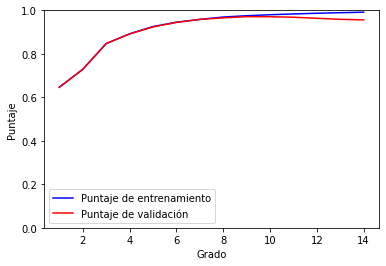

In [ ]:
#Tambien se puede construir una curva usando validación cruzada la cual nos permite ver en que valor del
#hyperparámetro no se mejora significativamente el desempeño del modelo
from sklearn.model_selection import validation_curve
max_depth=np.arange(1, 15)
train_score, val_score = validation_curve(DecisionTreeRegressor(), x, y,
                                          'max_depth', max_depth, cv=7)

plt.plot(max_depth, np.median(train_score, 1), color='blue', label='Puntaje de entrenamiento')
plt.plot(max_depth, np.median(val_score, 1), color='red', label='Puntaje de validación')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Puntaje');

In [ ]:
#Se procede a construir el modelo usando el hiperparámetro max_depth = 9, siendo el resultado de la anterior corrida.
adr = DecisionTreeRegressor(max_depth=9)
adr.fit(X_train, Y_train)
Y_adr_pred=adr.predict(X_test)
print(Y_adr_pred)

[0.53182896 1.1345348  3.07105578 ... 0.4218315  0.6143953  5.51491923]


In [ ]:
print('DATOS DEL MODELO ARBOLES DE DECISION REGRESIÓN')

print('Precisión del modelo:')
print(adr.score(X_train, Y_train))
print()
print('MAE: ', metrics.mean_absolute_error(Y_test, Y_adr_pred))
print('MSE: ', metrics.mean_squared_error(Y_test, Y_adr_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_adr_pred)))
print('R2: %.3f'% metrics.r2_score(Y_test, Y_adr_pred))

DATOS DEL MODELO ARBOLES DE DECISION REGRESIÓN
Precisión del modelo:
0.9762495083542081

MAE:  0.24036376961917022
MSE:  0.3167549372597291
RMSE:  0.5628098588863997
R2: 0.971


In [ ]:
#Cross Validation para el modelo de Árboles de Decisión
cv_results = cross_val_score(adr, X_train, Y_train, cv=5)
print(cv_results)

[0.97251084 0.97196107 0.96536278 0.96803949 0.97113626]


In [ ]:
df3= pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_adr_pred, 'Diference': ((Y_test-Y_adr_pred)/Y_test)})
df3['Diference'].sum()

-33222.74103679147

MODELO 4: BOSQUES ALEATORIOS REGRESION

In [ ]:
#Importamos la librería de Scikit Learn de bosques aleatorios Regresión para hacer ejercicios de predicción
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#De manera similar al modelo 3, los bosques aleatorios también cuentan con un conjunto de hyperparámetros que se deben de estimar. Usamos el siguiente
#comando para este modelo. En este caso se agregaron dos hyperparámetros: el número de árboles (n_estimators) y la profundidad de exploración (max_depth).
#Los mejores resultados para el set de datos de duración de la poliza se imprimen a continuación:
#from sklearn.model_selection import GridSearchCV
#from scipy.stats import randint

param_grid = {'max_depth': np.arange(1, 15),'n_estimators': np.arange(1, 15)}
knn = RandomForestRegressor(random_state=55)
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(x, y)
knn_cv.best_params_

KeyboardInterrupt: ignored

In [ ]:
#El comando anterior, nos da una idea del valor del hyperparámetro a definir, sin embargo en la siguiente 
#gráfica identificamos que tan rápido se llega el punto de codo o aun desempeño bueno del modelo entre el
#sesgo y varianza. Esto se construye usando también validación cruzada la cual nos permite ver en que valor del
#hyperparámetro no se mejora significativamente el desempeño del modelo
#Primero se corre para el número de árboles y se aprecia que a partir de 8 aproximadamente se aplana la curva.
#from sklearn.model_selection import validation_curve
#max_depth=np.arange(1, 15)
n_estimators=np.arange(1, 15)
train_score, val_score = validation_curve(RandomForestRegressor(random_state=55), x, y,
                                          'n_estimators', max_depth, cv=5)

plt.plot(max_depth, np.median(train_score, 1), color='blue', label='Puntaje de entrenamiento')
plt.plot(max_depth, np.median(val_score, 1), color='red', label='Puntaje de validación')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Puntaje');

In [ ]:
#Tambien se puede construir una curva usando validación cruzada la cual nos permite ver en que valor del
#hyperparámetro no se mejora significativamente el desempeño del modelo
#Para este caso usamos n_estimators=8 y revisamos el comportamiento de la profundidad max_depth
#from sklearn.model_selection import validation_curve
max_depth=np.arange(1, 15)
#n_estimators=np.arange(1, 15)
train_score, val_score = validation_curve(RandomForestRegressor(random_state=55, n_estimators=8), x, y,
                                          'max_depth', max_depth, cv=5)

plt.plot(max_depth, np.median(train_score, 1), color='blue', label='Puntaje de entrenamiento')
plt.plot(max_depth, np.median(val_score, 1), color='red', label='Puntaje de validación')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('Grado')
plt.ylabel('Puntaje');

In [ ]:
#Según la anterior gráfica se aprecia que la profundidad de exploración se aplana a partir de 9 aproximadamente
#Así se procede a construir el modelo usando el hiperparámetro max_depth = 9, y n_estimators de 8 
#siendo el resultado de los anteriores análisis.
RndFR = RandomForestRegressor(max_depth= 10, n_estimators= 8, random_state=55)
RndFR.fit(X_train, Y_train)
Y_rfr_pred=RndFR.predict(X_test)
print(Y_rfr_pred)

[0.50800639 1.16579885 2.94512616 ... 0.42185257 0.5790244  5.546279  ]


In [ ]:
print('DATOS DEL MODELO BOSQUES ALEATORIOS REGRESIÓN')

print('Precisión del modelo:')
print(RndFR.score(X_train, Y_train))
print()
print('MAE: ', metrics.mean_absolute_error(Y_test, Y_rfr_pred))
print('MSE: ', metrics.mean_squared_error(Y_test, Y_rfr_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(Y_test, Y_rfr_pred)))
print('R2: %.3f'% metrics.r2_score(Y_test, Y_rfr_pred))

DATOS DEL MODELO BOSQUES ALEATORIOS REGRESIÓN
Precisión del modelo:
0.9817897559653848

MAE:  0.2244625819236475
MSE:  0.29737278566084013
RMSE:  0.545318976068906
R2: 0.973


In [ ]:
#Cross Validation para el modelo de bosques aleatorios
cv_results = cross_val_score(RndFR, X_train, Y_train, cv=5)
print(cv_results)

[0.97551001 0.97534053 0.96808869 0.97407403 0.97363727]


In [ ]:
df4= pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_rfr_pred, 'Diference': ((Y_test-Y_rfr_pred)/Y_test)})
df4['Diference'].sum()

-32299.554317441984

Para cada uno de los 4 modelos, se calcularon métricas que miden qué tan bien (o mal) el modelo se ajusta a los datos de entrenamiento. Esta medida de evaluación (función de costo) es el error calculado entre la recta generada  y_estimada  (o el hiperplano) a los puntos reales.
Como se mencionó anteriormente para cada modelo se calcularon como medidas de error: Error medio absoluto (MAE), Error cuadrático medio (MSE), Raíz del error cuadrático medio (RMSE) y el R cuadrado que mide la precisión o el porcentaje de la variación en la variable de respuesta que es explicado por el modelo de predicción.

Según los resultados, los mejores modelos fueron el 3 y el 4, es decir las regresiones de árboles de decisión y bosques aleatorios respectivamente. En ambos modelos las métricas de error fueron muy similares o iguales en algunos casos. Sin embargo, teniendo en cuenta que los árboles de decisión son propensos a sobreajuste, vamos a seleccionar como mejor modelo los Bosques Aleatorios.

Por lo general, para reducir estos problemas de sobreajuste, lo que se hace es limitar el crecimiento del árbol de decisión, tal como se realizó al poner límite a la profundidad. Además la validación cruzada fue similar en el valor de precisión haciendo diferentes particiones de los datos, lo que nos da mayor confiabilidad en los modelos. Sin embargo, es mejor utilizar los Bosques Aleatorios porque si hay sufientes árboles en el bosque, el algoritmo no se adaptará al modelo, evitando así el sobreajuste o evitando el exceso de adaptación la mayor parte del tiempo, creando subconjuntos aleatorios de las características. Finalmente los bosques aleatorios son excelentes en el tradeoff entre el ajuste y la varianza, por lo cual no tienden a subestimar o sobreestimar el modelo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


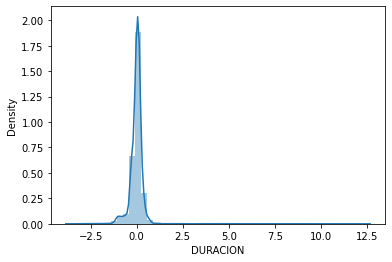

In [ ]:
#Los siguientes cálculos se harán con el modelo de Bosques Aleatorios
#Comprobemos que los errores se distribuyen según una distribución normal, lo que nos da una prueba de la validez de nuestro modelo.
#El siguiente se conoce como un histograma de residuos. Se construye con los datos del mejor modelo.
sns.distplot((Y_test - Y_rfr_pred), bins = 50)
#sns.distplot((Y_test - Y_pred_pr), bins = 50)
plt.show()

In [ ]:
#Ahora procedemos a realizar las mismas transformaciones de las variables del data set "datos_B", para aplicar el modelo de Bosques Aleatorios
#Se calcula la edad a partir de la fecha de nacimiento
dft['EDAD']=round((dt.datetime.now()-dft['FECHA_NACIMIENTO'])/np.timedelta64(1,'Y'))
#Variables Categóricas, como al cargarlas de Excel python las leía como tipo objeto, se convirtieron en categóricas:
dft['SEXO'] = dft['SEXO'].astype('category')
dft['NOMBRE_AGENCIA'] = dft['NOMBRE_AGENCIA'].astype('category')
dft['CIUDAD'] = dft['CIUDAD'].astype('category')
dft['OPCION'] = dft['OPCION'].astype('category')
#Para el caso de la variable categórica SEXO, se procede a convertir en variables dummies
dft = pd.get_dummies(dft, columns=['SEXO'])
#El campo CIUDAD tiene algunos problemas de calidad del dato, por ejemplo registros vacíos, datos numéricos, raya al piso
#sin datos, por lo cual en los siguientes comandos se mejora la calidad del campo:
dft['CIUDAD']=np.where (dft['CIUDAD'].str.isdigit().fillna(True), dft['CIUDAD'].mode()[0], dft['CIUDAD'])
dft['CIUDAD'].replace({'_':None}, inplace=True)
#Se ejecuta una imputación de datos muy general tomando la moda o el dato más frecuente para la variable ciudad que es la única con datos nulos
dft['CIUDAD'] = dft['CIUDAD'].fillna(dft['CIUDAD'].mode()[0])
print(dft.isnull().sum())
#Debido a las modificaciones anteriores sobre la ciudad, se corre de nuevo el comando para convertirla a Categórica
dft['NOMBRE_AGENCIA'] = dft['NOMBRE_AGENCIA'].astype('category')
dft['CIUDAD'] = dft['CIUDAD'].astype('category')
#Se codifican las variables Ciudad y Nombre de agencia para poderlas usar en el modelo. Esto debido a que los modelos de Machine Learning no toman
#estas variables como String. Esta codificación asigna un número a cada nivel de la variable categórica permitiendo usarse en el modelo. De tal forma se
#crean las variables CIUDAD_COD y NOMBRE_AGENCIA_COD
dft['CIUDAD_COD']=dft['CIUDAD'].cat.codes
dft['NOMBRE_AGENCIA_COD']=dft['NOMBRE_AGENCIA'].cat.codes
dft.columns

KeyError: ignored

In [ ]:
#Creamos la variable X de los datos que serán usados para hacer una estimación de la duración de la póliza, similar al caso anterior
X_test_nuevo = dft.drop(['FECHA_NACIMIENTO','NOMBRE_AGENCIA','CIUDAD'], axis=1)
print(X_test_nuevo.shape)

(15000, 9)


In [ ]:
#Corremos el modelo de Bosques Aleatorios Regresión con los datos nuevos
y_test_nueva = RndFR.predict(X_test_nuevo)
dft['DURACION'] = y_test_nueva
dft.head()

,OPCION,FECHA_NACIMIENTO,NOMBRE_AGENCIA,SUMA_ASEGURADA,CIUDAD,PRIMA_ANUAL,PRIMA_PAGADA,EDAD,SEXO_F,SEXO_M,CIUDAD_COD,NOMBRE_AGENCIA_COD,DURACION
ID,,,,,,,,,,,,,
45401,42,1974-03-30,AHUACHAPAN ...,40000,NUEVO CUSCATLAN,576,4032,47.0,0,1,209,1,6.736934
45040,11,1987-02-08,SONSONATE ...,10000,ARMENIA,96,288,35.0,0,1,21,92,3.133031
35388,14,1963-09-29,SAN VICENTE ...,10000,SAN VICENTE,300,50,58.0,1,0,354,86,0.320267
46450,11,1982-01-11,JIQUILISCO ...,10000,PUERTO EL TRIUNFO,96,96,40.0,1,0,233,52,1.115396
87535,11,1982-12-27,SENSUNTEPEQUE ...,10000,SENSUNTEPEQU,96,864,39.0,0,1,391,91,8.837682


Como análisis adicional a lo solicitado, realicé un modelo de clusterización con KMeans. Esto con el objetivo de crear algunos grupos que nos permitan clasificar la población de asegurados de la póliza con diferentes niveles de riesgo. Esto con el fin de gestionar la población y los riesgos para prevenir que cancelen la póliza. Una de las métricas usada para comparar resultados es la distancia media entre los puntos de datos y su centroide. Como el valor del score incrementará a medida de aumentemos el valor de K, deberemos utilizar la distancia media al centroide en función de K y entontrar el “punto codo”, donde la tasa de ascenso se “aplana”.
En este caso usamos la librería cluster de scikit learn.

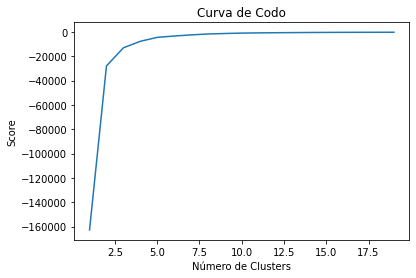

In [ ]:
#En primer lugar, generamos la siguiente gráfica que realiza un análisis para diferentes valores de K o el
#número de grupos, para determinar el "punto de codo" y así cuántos grupos para la gestión de riesgos de
#cancelación de la póliza construir
#Variables_K_means = dft[['SUMA_ASEGURADA','PRIMA_ANUAL','PRIMA_PAGADA','DURACION']]
Variables_K_means = dft['DURACION'].values.reshape(-1,1)
duracion=dft.values.reshape(-1,1)
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Variables_K_means).score(Variables_K_means) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Curva de Codo')
plt.show()

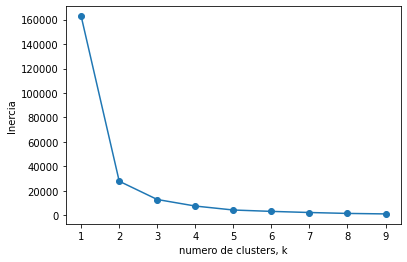

In [ ]:
#Otro método adicional para identificar el kmeans óptimo a partir de la inercia o distancia del centroide a 
#cada uno de los puntos se presenta a continuación.
ks = range(1, 10)
inercia = []
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(Variables_K_means)
    inercia.append(model.inertia_)
    
plt.plot(ks, inercia, '-o')
plt.xlabel('numero de clusters, k')
plt.ylabel('Inercia')
plt.xticks(ks)
plt.show()

In [ ]:
#Según los anteriores gráficos, la curva se suaviza en un punto de codo de 3 aproximadamente en ambos análisis.
#Dado esto vamos a construir 3 clusters para gestionar el riesgo de cancelación de los asegurados
kmeans = KMeans(n_clusters=3).fit(Variables_K_means)
centroids = kmeans.cluster_centers_
print(centroids)

[[9.30552795]
 [0.90455608]
 [4.47121856]]


A continuación crearemos tres categorías de riesgo para gestionar la población. Los tres grupos son:

    1: 'Riesgo_Alto': Significa un riesgo de cancelación de la póliza alto y hace referencia a los asegurados que duran en promedio 0.899 años en el seguro, siendo este el centroide del grupo.
    0: 'Riesgo_Medio':  Significa un riesgo de cancelación de la póliza medio y hace referencia a los asegurados que duran en promedio 4.348 años en el seguro, siendo este el centroide del grupo.
    2: 'Riesgo_Bajo': Significa un riesgo de cancelación de la póliza bajo y hace referencia a los asegurados que duran en promedio 9.194 años en el seguro, siendo este el centroide del grupo.

In [ ]:
Grupos=kmeans.predict(Variables_K_means)
dft['Grupos']=Grupos
dft['Desc_Grupos']=dft['Grupos'].map({0: 'Riesgo_Medio',1: 'Riesgo_Alto',2:'Riesgo_Bajo'})

In [ ]:
dft.head()

,OPCION,FECHA_NACIMIENTO,NOMBRE_AGENCIA,SUMA_ASEGURADA,CIUDAD,PRIMA_ANUAL,PRIMA_PAGADA,EDAD,SEXO_F,SEXO_M,CIUDAD_COD,NOMBRE_AGENCIA_COD,DURACION,Grupos,Desc_Grupos
ID,,,,,,,,,,,,,,,
45401,42,1974-03-30,AHUACHAPAN ...,40000,NUEVO CUSCATLAN,576,4032,47.0,0,1,209,1,6.736934,2,Riesgo_Bajo
45040,11,1987-02-08,SONSONATE ...,10000,ARMENIA,96,288,35.0,0,1,21,92,3.133031,2,Riesgo_Bajo
35388,14,1963-09-29,SAN VICENTE ...,10000,SAN VICENTE,300,50,58.0,1,0,354,86,0.320267,1,Riesgo_Alto
46450,11,1982-01-11,JIQUILISCO ...,10000,PUERTO EL TRIUNFO,96,96,40.0,1,0,233,52,1.115396,1,Riesgo_Alto
87535,11,1982-12-27,SENSUNTEPEQUE ...,10000,SENSUNTEPEQU,96,864,39.0,0,1,391,91,8.837682,0,Riesgo_Medio


A continuacióny como parte final del proceso, exportamos a Excel el Dataframe incluyendo la variable predicha de la Duración en la poliza utilizando los Datos B. El nuevo nombre del archivo fue nombrado datos_B_Duracion y quedan guardados en la misma ruta de donde se importaron las bases de datos

In [ ]:
#dft.to_clipboard()
dft.to_excel(r"D:\Usuarios\sebacoza\OneDrive - Seguros Suramericana, S.A\Desktop\datos_B_Duracion.xlsx", index = True)